# An Introduction to FEAST v2.0

FEAST v2.0 is a Python implementation of the Fugitive Emmissions Abatement Simulation Toolkit (FEAST) published by the Environmental Assessment and Optimization group at Stanford University. FEAST v2.0 generates similar results to FEAST v1.0 and includes some updates to the code structure to make the model more accessible. Extended documentation of FEAST is available [here](https://github.com/EAOgroup/FEAST/blob/master/Archive/FEAST_v1.0/FEASTDocumentation.pdf).

This tutorial gives an example of how to generate a realization of the default scenario in FEAST v2.0, analyze results, and change settings to generate a custom realization. The tutorial is interactive, so feel free to experiment with the code cells and discover how your changes affect the results.

## Running the default scenario

The default scenario simulates four leak detection and repair (LDAR) programs over a 10 year period. Leak distribution data sets, LDAR parameters and gas field properties are all assumed in order to generate the results.

Producing a single realization of the default scenario requires two lines of code: one to load the function *field_simulation* to the active python kernel, and the second to call the function. The code cell below illustrates the commands. The optional argument *dir_out* specifies the directory in which to save results from the simulation. It will take about one minute to complete the simulation.

In [1]:
from field_simulation import field_simulation
field_simulation(dir_out='./Results')

Currently evaluating time step 399 of 4001
Currently evaluating time step 799 of 4001
Currently evaluating time step 1199 of 4001
Currently evaluating time step 1600 of 4001
Currently evaluating time step 2000 of 4001
Currently evaluating time step 2400 of 4001
Currently evaluating time step 2800 of 4001
Currently evaluating time step 3200 of 4001
Currently evaluating time step 3600 of 4001
Currently evaluating time step 4000 of 4001


Each new realization is saved under the name "realization0," and the final integer is incremented by one with each new realization generated. The results can be viewed by using the built in plotting functions. There are three plotting functions available. The first produces a time series of the leakage in single realization file. It is shown in the code cell below.

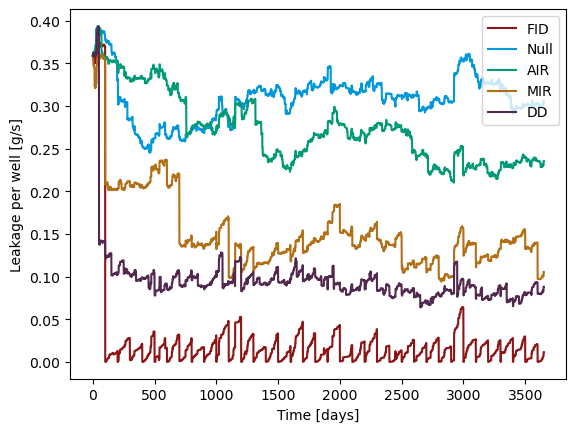

In [2]:
# First the necessary functions are loaded to the active kernel
from GeneralClassesFunctions import plotting_functions
# Then the time series plotting function is called with a path to a
# specific results file
plotting_functions.time_series('./Results/realization0.p')

The other two plotting functions accumulate the data from all realizations in a directory. In order to illustrate their utility, multiple realizations should be used. For illustration purposes, four more realizations are generated below. To suppress the time step updates from *field_simulation()*, the optional command *display_status=False* was added.

In [3]:
for ind in range(0,4):
    print("Currently evaluating iteration number " + str(ind))
    field_simulation(display_status=False, dir_out='./Results')

Currently evaluating iteration number 0
Currently evaluating iteration number 1
Currently evaluating iteration number 2
Currently evaluating iteration number 3


Now there are five realizations of the default scenario in the "Results" folder. The *summary_plotter* function compiles results from all five to show the mean net present value, the estimated uncertainty in the sample mean from the mean of infinite realizations of the same scenario, and the types of costs and benefits that contributed to to the net present value. *summary_plotter* was already loaded to the kernel as part of the *plotting_functions* module, so it is called directly in the cell below.

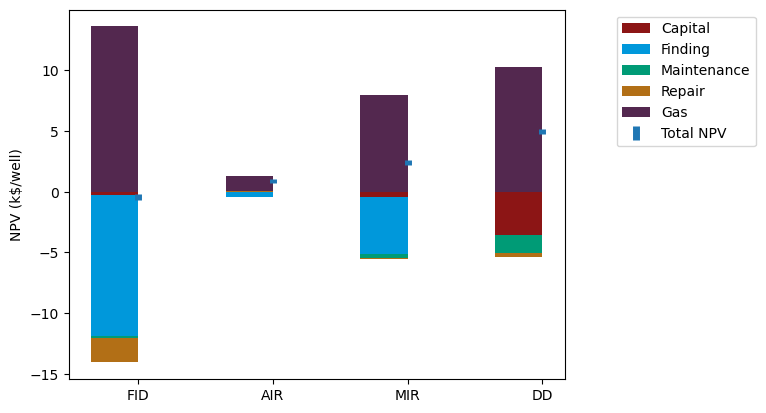

In [4]:
# summary_plotter requires a path to a results directory as an input
plotting_functions.summary_plotter('./Results')

*hist_plotter* allows the leak repair performance of each LDAR program to be evaluated without regard to financial value. The function generates a histogram of the sizes of leaks found by each program. Like *summary_plotter*, *hist_plotter* combines results from all realizations in a directory. Unlike *summary_plotter*, *hist_plotter* generates the plots in separate windows from the notebook by default. An optional *inline=True* command was added to ensure that the plots pop up in this notebook.

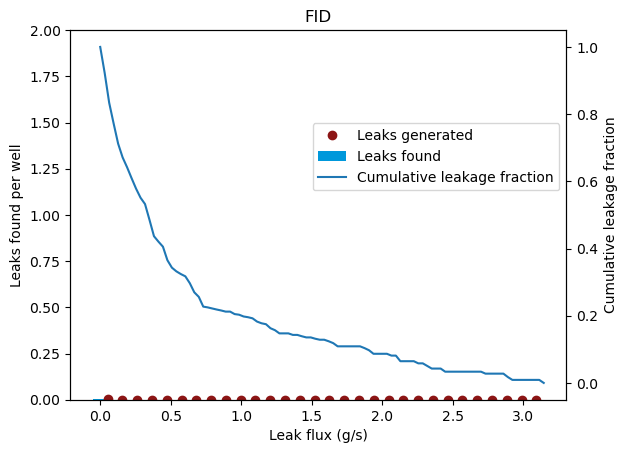

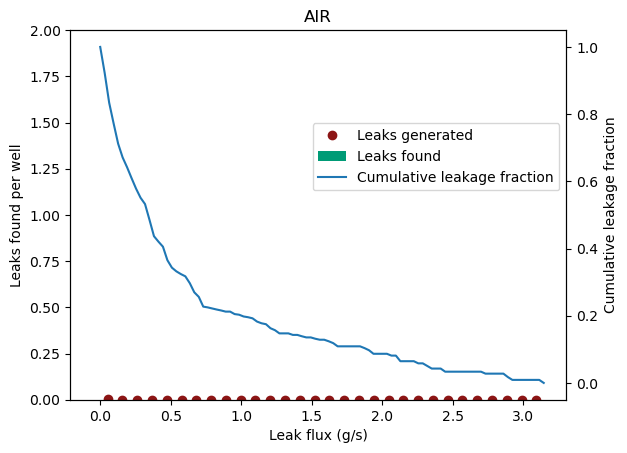

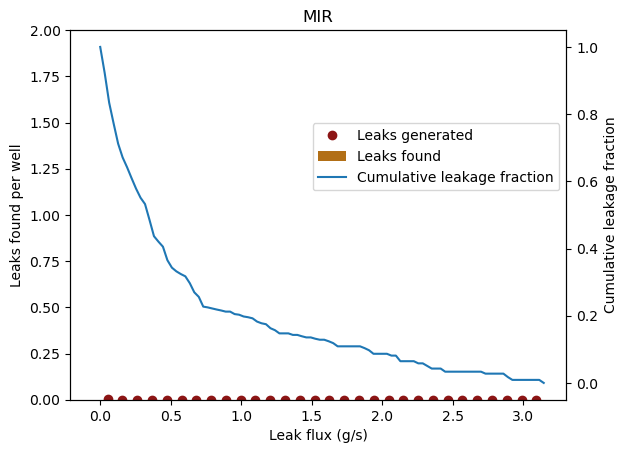

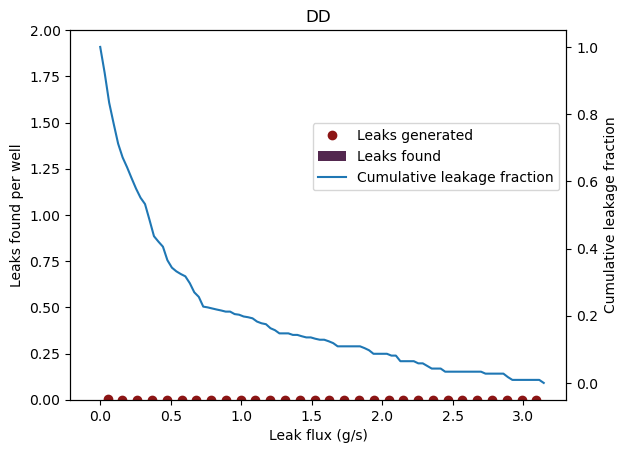

In [5]:
plotting_functions.hist_plotter('./Results', inline=True)

FEAST has the capability to rapidly calculate the value of improving detection technology or changing operating procedures. Users can define any parameters they choose in existing LDAR program simulations, and more ambitious users can create their own LDAR program modules. The cell below illustrates how unique technology instances can be generated and simulated simultaneously for easy comparison. The call to *field_simulation* uses the option argument *dir_out* to define a directory to place the results in. 

In [6]:
# This cell compares the performance of three AIR LDAR programs 
# with varying camera sensitivities.
# First, the modules neaded to create the AIR objects must be 
# imported to the kernel
from DetectionModules import ir
from GeneralClassesFunctions import simulation_classes
# The loop is used to generate 5 independent realizations of the 
# desired simulation
for ind in range(0,5):
    print("Currently evaluating iteration number " + str(ind))
    # Before creating the LDAR objects, a few properties of the 
    # simulation need to be set.
    # The default GasField settings are used
    gas_field = simulation_classes.GasField()
    # A time step of 10 days is specified (instead of the default
    # timestep of 1 day) to speed up the simulation
    time = simulation_classes.Time(delta_t = 10)
    #  Each camera is defined below by its noise equivalent 
    # temperature difference (netd). 
    # In the default scenario, the netd is 0.015 K
    Default_AIR = ir.AIR(time=time, gas_field=gas_field)
    Better_AIR = ir.AIR(time=time, gas_field=gas_field, netd=0.005)
    Best_AIR = ir.AIR(time=time, gas_field=gas_field, netd=0.001)
    # All of the tetchnologies are combined into a dict to be passed 
    # to field_simulation()
    tech_dict = {'Default_AIR': Default_AIR, 'Better_AIR': Better_AIR,
                 'Best_AIR': Best_AIR}
    # field_simulation is called with the predefined objects, 
    # and an output directory is specified
    field_simulation(time=time, gas_field=gas_field, tech_dict=tech_dict, 
                     dir_out='./Results/AIR_Sample', display_status=False)

Currently evaluating iteration number 0
Currently evaluating iteration number 1
Currently evaluating iteration number 2
Currently evaluating iteration number 3
Currently evaluating iteration number 4


The function *hist_plotter* shows how the improved sensitivity affects the size of leaks detected:

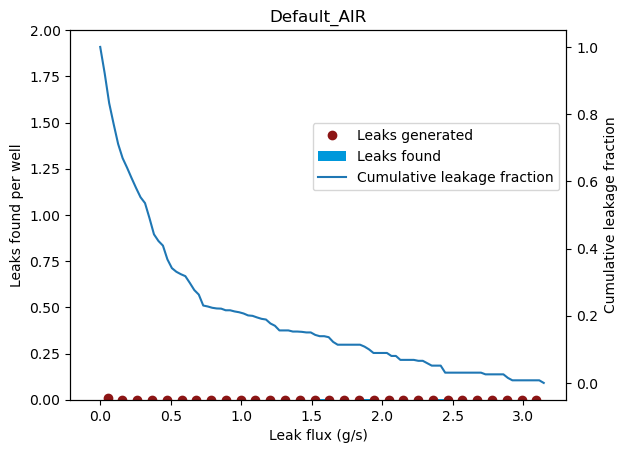

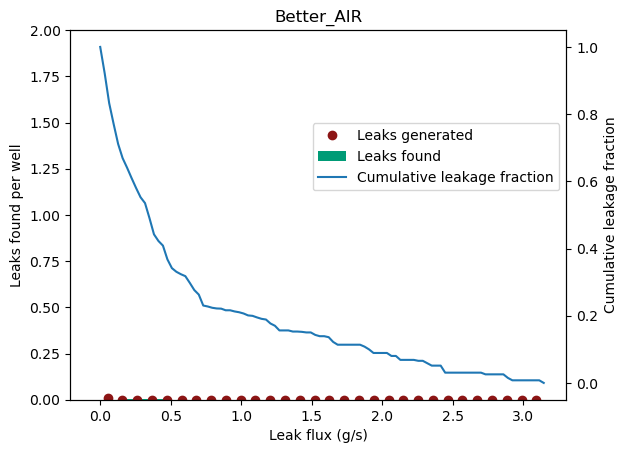

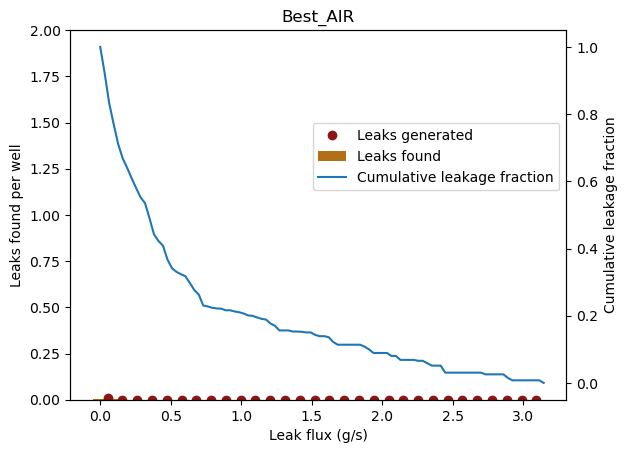

In [7]:
plotting_functions.hist_plotter('./Results/AIR_Sample',inline=True)

*summary_plotter* is used to illustrate the financial value of improving camera sensitivity.

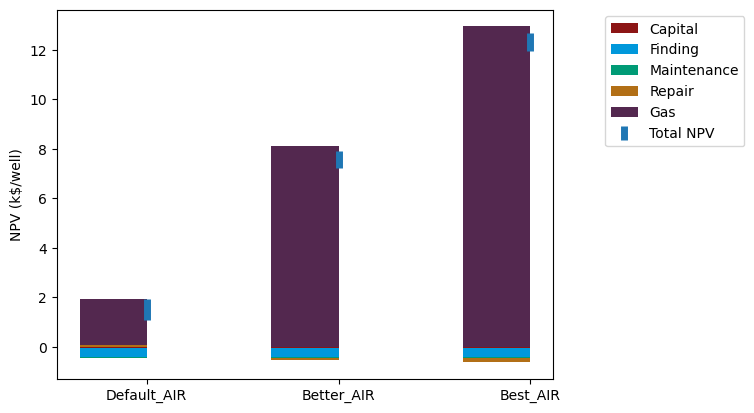

In [8]:
plotting_functions.summary_plotter('./Results/AIR_Sample')

The above AIR example gives a glimpse into the possible analyses using FEAST v2.0. Any of the default parameters in FEAST v2.0 can be modified from the command line, stored in an object and used in a gas field simulation. The model is open source and freely available so that code can be customized and new technology modules can be added by private users. 

The default parameters in FEAST v2.0 are intended to provide a realistic starting point but should be customized to accurately portray any particular gas field or LDAR program. In this tutorial, a sample size of five realizations was used to demonstrate the plotting functions, but a larger sample size should be used in any rigorous analysis in order to understand the stochastic error in the model.

Please contact chandler.kemp@gmail.com with any questions or suggestions regarding the code contained in FEAST.